In [1]:
from db_utils import *
import scipy.ndimage as ff
import sys
sys.path.append('../../lagrangian/')
import stats

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [2]:
plt.rcParams['font.size'] = 24
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.dpi'] = 60
plt.rcParams['legend.markerscale'] = 2

In [3]:
run = 6
number = 1750

In [4]:
path = f'/scratch/scarpolini/'+DB_NAME+'/'+WGAN_TYPE+f'/runs/{run}/{number}_gen.h5'
gen = load_model(path)

W1108 16:54:02.383516 47980970499584 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1108 16:54:02.386955 47980970499584 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1108 16:54:02.450121 47980970499584 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (fr

In [5]:
z = np.random.standard_t(4,size=(50000,100))
traj = gen.predict(z)
sigma = 0.5

input1 = gen.input               # input placeholder
output1 = [layer.output for layer in gen.layers]# all layer outputs

#output1 = gen.layers[14].output

all_hidden_outputs = K.function([input1, K.learning_phase()],output1)# evaluation function

def output_from_intermediate_input(input_index, output_index):
    input1 = gen.layers[input_index].input
    output1 = gen.layers[output_index].output
    res = K.function([input1, K.learning_phase()],output1)
    return res


layer_outputs = all_hidden_outputs([z, 0])


##.  initial_output_index = 8
##.  in_indexes = [9,12,15]
##.  out_indexes = [11,14,17]
##.  
##.  mod_output = [ff.gaussian_filter1d(
##.          layer_outputs[initial_output_index],
##.          sigma=sigma,
##.          mode='nearest',
##.          axis=1)]
##.  
##.  
##.  ## QUI SMOOTHO I CANALI IN USCITA DAI VARI LAYER DEL GENERATORE PRIMA DI
##.  ## REIMMETTERLI NEI LAYER SUCCESSIVI. IN QUESTO MODO MAGARI LO SMOOTHING È
##.  ## MENO INVASIVO IN QUANTO POSSO USARE SIGMA PIÙ PICCOLO, DILUITO SU VARI
##.  ## LAYER
##.  
##.  for i in range(len(in_indexes)):
##.      next_input = mod_output[-1]
##.      output = output_from_intermediate_input(in_indexes[i], out_indexes[i])(
##.          [next_input, 0])
##.      
##.      if i == len(in_indexes) - 1:
##.          mod_output.append(output)
##.      else :
##.          mod_output.append(ff.gaussian_filter1d(
##.              output,
##.              sigma=sigma,
##.              mode='nearest',
##.              axis=1))
    
    
    

In [7]:
##. for ii, output in enumerate(layer_outputs):
##.     np.save(f'lay_outs/{ii}_hid_layers_outputs', output)
outs.shape

(50000, 1000, 8)

In [8]:
souts = ff.gaussian_filter1d(outs,sigma=2,mode='nearest', axis=1) ## la gaussiana è troncata a 4 sigma

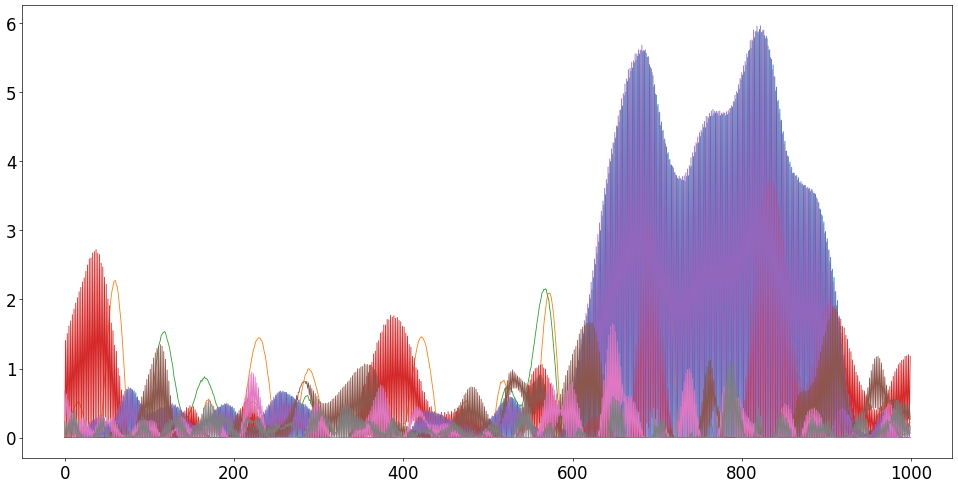

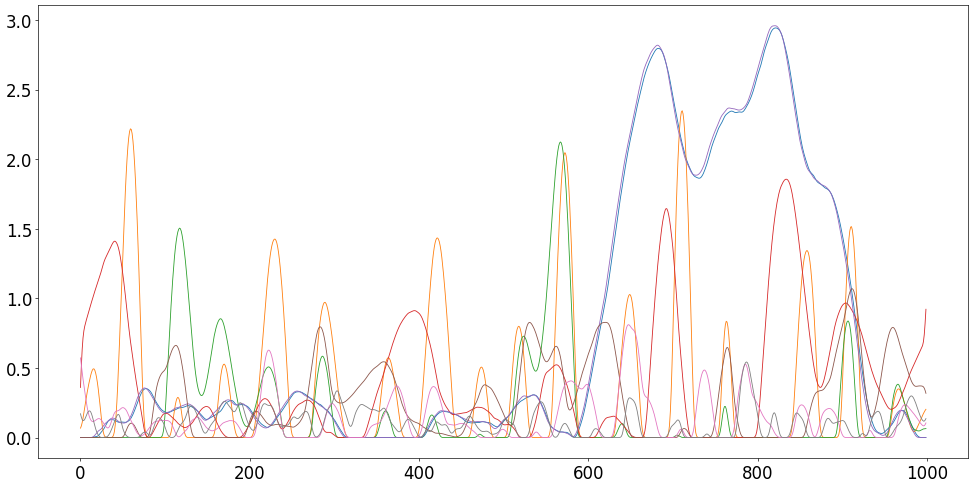

In [9]:
plt.figure(figsize=(20,10))
plt.plot(outs[0])
plt.show()
import scipy.ndimage as ff
plt.figure(figsize=(20,10))
plt.plot(souts[0])
plt.show()

## plotto ls pdf di un signolo layer

In [10]:
for i in range(len(layer_outputs)):
    print(i, layer_outputs[i].shape, gen.layers[i].name)
    
#gen.summary()

0 (50000, 3200) dense
1 (50000, 3200) re_lu
2 (50000, 25, 1, 128) reshape
3 (50000, 25, 1, 128) batch_normalization
4 (50000, 125, 1, 64) conv2d_transpose
5 (50000, 125, 1, 64) re_lu_1
6 (50000, 125, 1, 64) batch_normalization_1
7 (50000, 250, 1, 32) conv2d_transpose_1
8 (50000, 250, 1, 32) re_lu_2
9 (50000, 250, 1, 32) batch_normalization_2
10 (50000, 500, 1, 16) conv2d_transpose_2
11 (50000, 500, 1, 16) re_lu_3
12 (50000, 500, 1, 16) batch_normalization_3
13 (50000, 1000, 1, 8) conv2d_transpose_3
14 (50000, 1000, 1, 8) re_lu_4
15 (50000, 1000, 1, 8) batch_normalization_4
16 (50000, 2000, 1, 1) conv2d_transpose_4
17 (50000, 2000, 1, 1) activation
18 (50000, 2000, 1) reshape_1


In [6]:
out_index = 14 # penultima attivazione
outs = layer_outputs[out_index].squeeze()
n_filters = outs.shape[-1]

In [10]:
print("Initial shape: ",
      layer_outputs[out_index].shape)
print("Squeezed shape: ",
      outs.shape)

Initial shape:  (50000, 1000, 1, 8)
Squeezed shape:  (50000, 1000, 8)


In [11]:
# Percentuale di zeri nell'array totale.
percs = []
for i in range(n_filters):
    tp = outs[:,:,i]
    percs.append(tp[tp==0.].size/tp.size)
    print("layer ",i,"zeros over total: ",percs[-1])

layer  0 zeros over total:  0.48116434
layer  1 zeros over total:  0.50721254
layer  2 zeros over total:  0.56274396
layer  3 zeros over total:  0.51952754
layer  4 zeros over total:  0.48180486
layer  5 zeros over total:  0.48173886
layer  6 zeros over total:  0.5258773
layer  7 zeros over total:  0.47491534


In [12]:
# array di cui plottare pdf per each layer e stessa cosa
# per le derivate
a = souts
b = np.gradient(a, axis=1)

In [14]:
def compute_std(pdf):
    mean = 0.
    x = pdf[0,:]
    y = pdf[1,:]
    for i in range(len(x)-1):
        mean = mean + (x[i+1] - x[i]) * y[i] * x[i]

    norm = 0.        
    #norm = norm + (x[1] - x[0]) * (y[0]-mean)**2.
    #norm = norm + (x[-2] - x[-1]) * (y[-1]-mean)**2.
    for i in range(len(x)-1):
        norm = norm + (x[i+1] - x[i]) * y[i] * (x[i] - mean)**2.
    norm = np.sqrt(norm)
    return norm

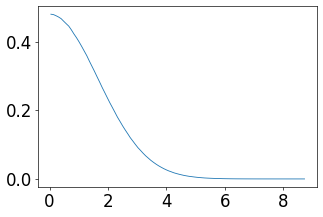

In [42]:
plt.plot(*(normal_pdf_pos))

In [13]:
normal = np.random.normal(0,1,50000*1000)
normal = normal[normal>0.]
print(normal.shape)
normal_pdf_pos, mean, std = stats.make_hist(normal,std=False, out=True, bins=100)
print(mean, std)
normal_pdf_pos[0,:] = normal_pdf_pos[0,:] / std
normal_pdf_pos[1,:] = normal_pdf_pos[1,:] * std

normal = np.random.normal(0,1,50000*1000)
normal_pdf = stats.make_hist(normal,std=True, bins=100)

(25002281,)
0.7978202826521152 0.6027337211488495
0.9999769973716571


n_filters:  8
filter n 0 
	0:mean  0.2784779  std  0.568207
	1:mean  -1.98668e-05  std  0.011039596
filter n 1 
	0:mean  0.5032588  std  0.5859848
	1:mean  5.1304058e-05  std  0.0618148
filter n 2 
	0:mean  0.49272802  std  0.63986015
	1:mean  -3.3237913e-05  std  0.03938484
filter n 3 
	0:mean  0.34763512  std  0.37560877
	1:mean  7.2764495e-05  std  0.018689366
filter n 4 
	0:mean  0.28298065  std  0.5736015
	1:mean  6.463426e-05  std  0.011304621
filter n 5 
	0:mean  0.2445056  std  0.21453205
	1:mean  5.9421327e-05  std  0.016806647
filter n 6 
	0:mean  0.1534712  std  0.15752293
	1:mean  2.3341223e-05  std  0.01955564
filter n 7 
	0:mean  0.10183646  std  0.08561011
	1:mean  1.1075427e-05  std  0.012968525


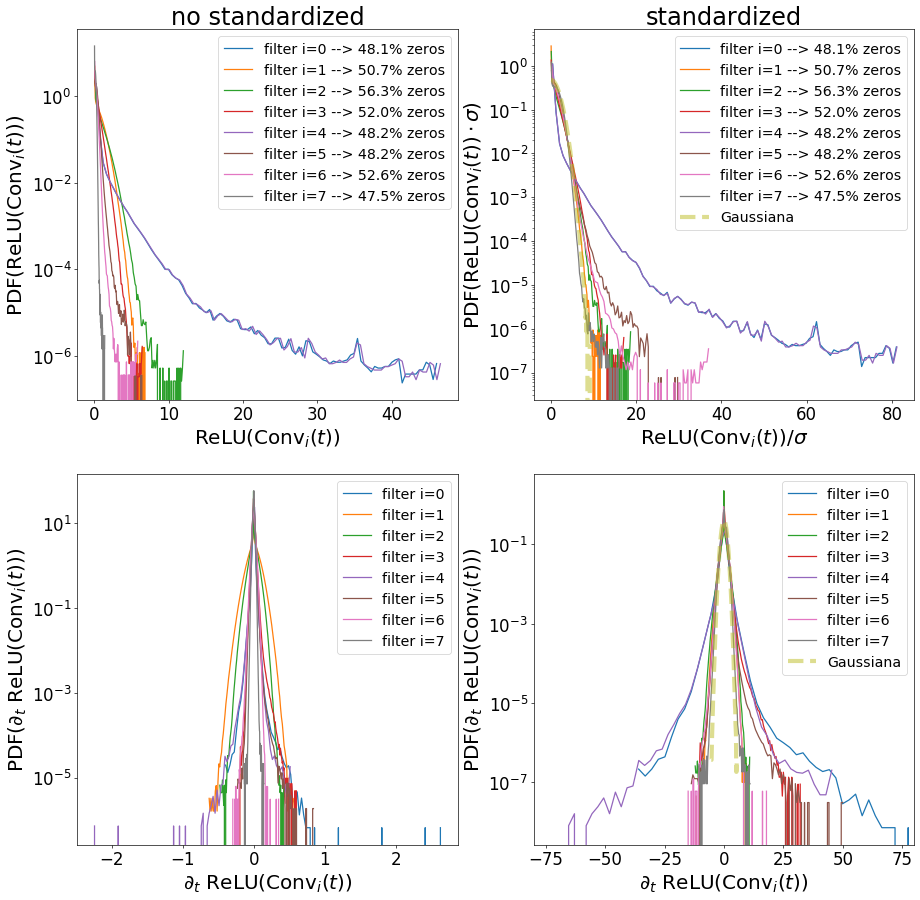

In [14]:
# AGGIUNGERE LINEA TRATTEGGIATA CON GAUSSIANA

# NON VADO IN ELIF TYPE NUMPY ARRAY !!! ANALIZZARE

histop={'std':False, 'bins':100, 'out':True}
pltop={'lw':1.5}
pltop_gauss={'lw':5, 'alpha':0.5, 'ls':'--'}
print("n_filters: ",n_filters)
fig, ax = plt.subplots(2,2,figsize=(18,18))

for nf in range(n_filters):
    nozeros = a[:,:,nf]
    nozeros = nozeros[nozeros != 0.]
    pdf, mean, std = stats.make_hist(nozeros,**histop)
    print('filter n', nf, '\n\t0:mean ', mean, ' std ', std)
    ax[0,0].plot(*(pdf), label=f'filter i={nf} --> {percs[nf]*100:.1f}% zeros', **pltop)
    #print('norm : ', compute_std(pdf))
    pdf[0,:] = pdf[0,:] / std
    pdf[1,:] = pdf[1,:] * std
    #print('norm : ', compute_std(pdf))
    
    ax[0,1].plot(*(pdf), label=f'filter i={nf} --> {percs[nf]*100:.1f}% zeros', **pltop)
    
    pdf, mean, std  = stats.make_hist(b[:,:,nf],**histop)
    print('\t1:mean ', mean, ' std ', std)
    ax[1,0].plot(*(pdf), label=f'filter i={nf}', **pltop)
    #print('der norm : ', compute_std(pdf))
    pdf[0,:] = ( pdf[0,:] - mean ) / std
    pdf[1,:] = pdf[1,:] * std
    #print('der norm : ', compute_std(pdf))
    ax[1,1].plot(*(pdf), label=f'filter i={nf}', **pltop)
    
ax[0,1].plot(*(normal_pdf_pos), label='Gaussiana', **pltop_gauss)
ax[1,1].plot(*(normal_pdf), label='Gaussiana', **pltop_gauss)
    
ax[0,0].set_yscale('log')
#ax[0,0].set_xscale('log')
ax[0,0].set_xlabel('ReLU(Conv$_i(t))$')
ax[0,0].set_ylabel('PDF(ReLU(Conv$_i(t))$)')
ax[0,0].legend(loc='upper right')
ax[0,0].set_title('no standardized')
ax[0,1].set_yscale('log')
#ax[0,1].set_xscale('log')
ax[0,1].set_xlabel('ReLU(Conv$_i(t))/\\sigma$')
ax[0,1].set_ylabel('PDF(ReLU(Conv$_i(t))\\cdot \\sigma$)')
ax[0,1].set_title('standardized')
ax[0,1].legend(loc='upper right')
ax[1,0].set_yscale('log')
#####ax[1,0].set_xscale('symlog', linthreshx=5)
#ax[1,0].set_xscale('log')
ax[1,0].set_xlabel('$\\partial_t$ ReLU(Conv$_i(t))$')
ax[1,0].set_ylabel('PDF($\\partial_t$ ReLU(Conv$_i(t))$)')
ax[1,0].legend(loc='upper right')
ax[1,1].set_yscale('log')
#####ax[1,1].set_xscale('symlog', linthreshx=5.e1)
#ax[1,1].set_xscale('log')
ax[1,1].set_xlim([-80,80])
ax[1,1].set_xlabel('$\\partial_t$ ReLU(Conv$_i(t))$')
ax[1,1].set_ylabel('PDF($\\partial_t$ ReLU(Conv$_i(t))$)')
ax[1,1].legend(loc='upper right')

fig.savefig('penultimate_layer_pdfs', dpi=100, fmt='png')

n_filters:  8


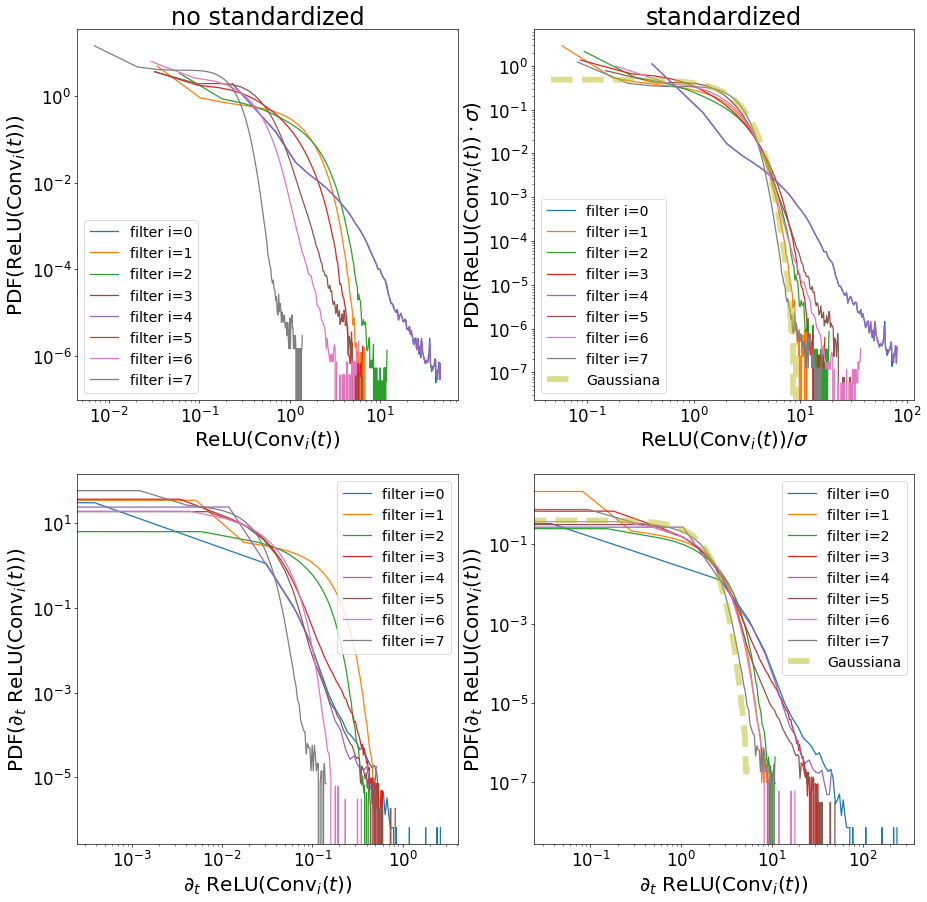

In [15]:
# SENZA % DI ZERI ED IN SCALA LOG
histop={'std':False, 'bins':100, 'out':True}
pltop={'lw':1.5}
pltop_gauss={'lw':7, 'alpha':0.5, 'ls':'--'}
print("n_filters: ",n_filters)
fig, ax = plt.subplots(2,2,figsize=(18,18))

for nf in range(n_filters):
    nozeros = a[:,:,nf]
    nozeros = nozeros[nozeros != 0.]
    pdf, mean, std = stats.make_hist(nozeros,**histop)
    ax[0,0].plot(*(pdf), label=f'filter i={nf}', **pltop)
    pdf[0,:] = pdf[0,:] / std
    pdf[1,:] = pdf[1,:] * std
    
    ax[0,1].plot(*(pdf), label=f'filter i={nf}', **pltop)
    pdf, mean, std  = stats.make_hist(b[:,:,nf],**histop)
    ax[1,0].plot(*(pdf), label=f'filter i={nf}', **pltop)
    pdf[0,:] = ( pdf[0,:] - mean ) / std
    pdf[1,:] = pdf[1,:] * std
    ax[1,1].plot(*(pdf), label=f'filter i={nf}', **pltop)
    
ax[0,1].plot(*(normal_pdf_pos), label='Gaussiana', **pltop_gauss)
ax[1,1].plot(*(normal_pdf), label='Gaussiana', **pltop_gauss)
    
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_xlabel('ReLU(Conv$_i(t))$')
ax[0,0].set_ylabel('PDF(ReLU(Conv$_i(t))$)')
ax[0,0].legend(loc='lower left')
ax[0,0].set_title('no standardized')
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlabel('ReLU(Conv$_i(t))/\\sigma$')
ax[0,1].set_ylabel('PDF(ReLU(Conv$_i(t))\\cdot \\sigma$)')
ax[0,1].set_title('standardized')
ax[0,1].legend(loc='lower left')
ax[1,0].set_yscale('log')
#ax[1,0].set_xscale('symlog', linthreshx=1e-1)
ax[1,0].set_xscale('log')
ax[1,0].set_xlabel('$\\partial_t$ ReLU(Conv$_i(t))$')
ax[1,0].set_ylabel('PDF($\\partial_t$ ReLU(Conv$_i(t))$)')
ax[1,0].legend(loc='upper right')
ax[1,1].set_yscale('log')
#ax[1,1].set_xscale('symlog', linthreshx=5)
ax[1,1].set_xscale('log')
ax[1,1].set_xlabel('$\\partial_t$ ReLU(Conv$_i(t))$')
ax[1,1].set_ylabel('PDF($\\partial_t$ ReLU(Conv$_i(t))$)')
ax[1,1].legend(loc='upper right')

fig.savefig('penultimate_layer_pdfs', dpi=100, fmt='png')

n_filters:  8


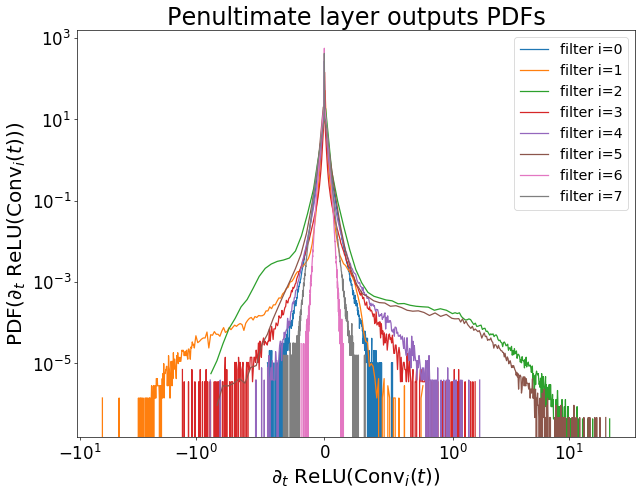

In [11]:
histop={'std':False, 'bins':500}
pltop={'lw':1.5}
print("n_filters: ",n_filters)
plt.figure(figsize=(12,9))
for nf in range(n_filters):
#    nozeros = outs1[:,:,nf]
#    nozeros = nozeros[nozeros != 0.]
    pdf = stats.make_hist(outs1[:,:,nf],**histop)
    plt.plot(*(pdf), label=f'filter i={nf}', **pltop)
    
plt.yscale('log')
plt.xscale('symlog', linthreshx=1.)
plt.xlabel('$\\partial_t$ ReLU(Conv$_i(t))$')
plt.ylabel('PDF($\\partial_t$ ReLU(Conv$_i(t))$)')
plt.legend(loc='upper right')
plt.title('Penultimate layer outputs PDFs')
plt.savefig('penultimate_layer_pdfs', dpi=100, fmt='png')
plt.show()

In [ ]:
out_indexes = [11,14,17]

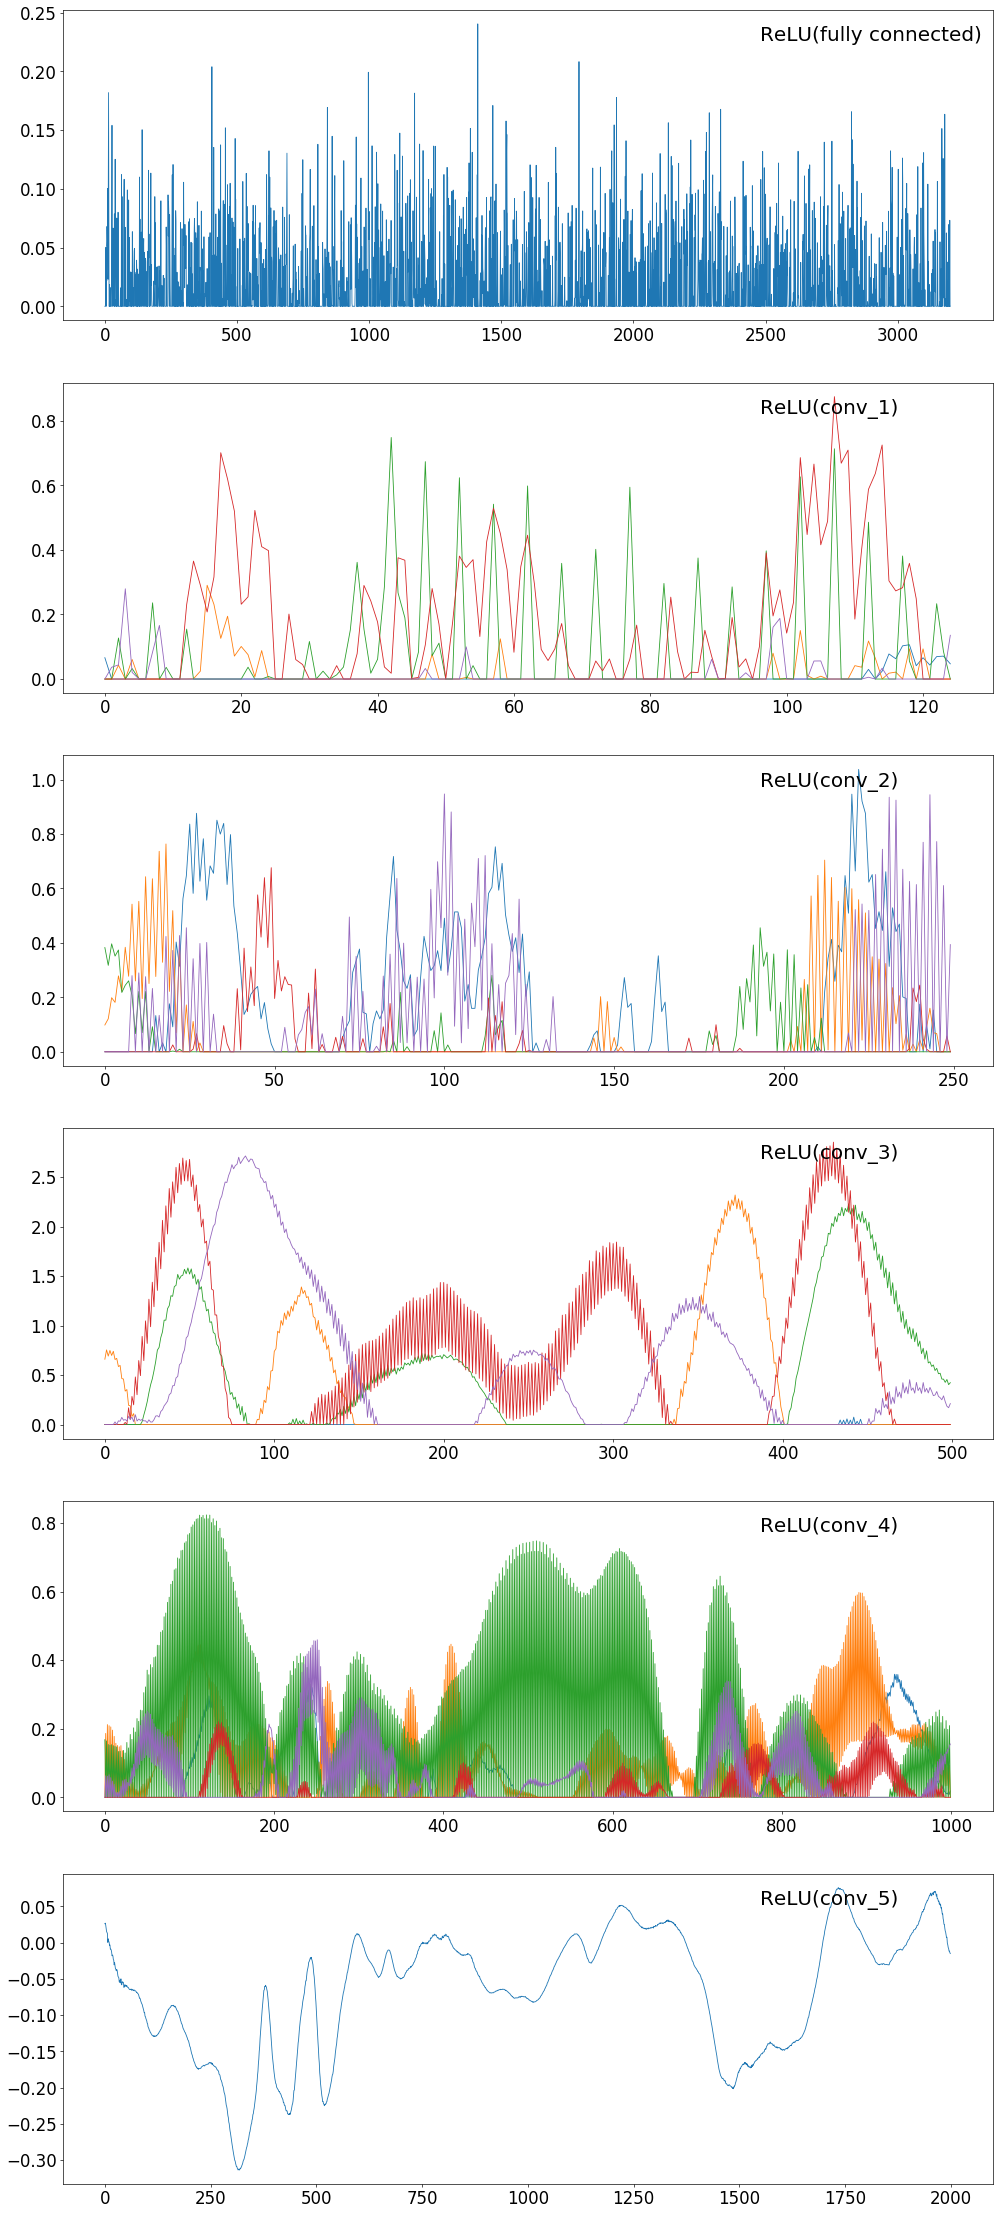

In [13]:
position = 'neuron'
mod = False
#out_indexes.insert(0,initial_output_index)

if WGAN_TYPE == 'wgangp2048' :
    neurons_indexes = [2,6,9,12,15,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [1,5,8,11,14]
elif WGAN_TYPE == 'wgangp' :
    neurons_indexes = [1,5,8,11,14,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [3,6,9,12,15]
i = slice(0,5) ## indice del filtro
j = 4          ## indice del layer
if position == 'neuron':
    indexes = neurons_indexes
elif position == 'conv':
    indexes = conv_indexes
elif position == 'norm':
    indexes = norm_indexes
plt.rcParams['figure.figsize'] = (20, 8*len(indexes))
labels = []
if position == 'neuron':
    for jj in range(len(indexes)):
        if jj==0: labels.append('ReLU(fully connected)')
        else:
            labels.append('ReLU(conv_'+str(jj)+')')
elif position == 'conv':
    for jj in range(len(indexes)):
        if jj==0: labels.append('dense')
        else:
            labels.append('conv_'+str(jj))
elif position == 'norm':
    for jj in range(len(indexes)):
        labels.append('norm(ReLU_'+str(jj)+')')


fig, ax = plt.subplots(len(indexes),1)
if position == 'norm':
    for jj, j in enumerate(indexes):
        ax[jj].plot(layer_outputs[j][0,:,0,i])
        ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
else:
    for jj, j in enumerate(indexes):
        if jj==0:
            ax[jj].plot(layer_outputs[j][0,:])
            ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
        else:
            if mod and (j in out_indexes):
                ax[jj].plot(mod_output[out_indexes.index(j)][0,:,0,i])
                #ax[jj].plot(layer_outputs[j][0,:,0,i])
                ax[jj].text(0.75,0.9,labels[jj]+' mod', transform=ax[jj].transAxes)
            else:
                ax[jj].plot(layer_outputs[j][0,:,0,i])
                ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)

## Ora provo a mostrare le pdf degli output ad ogni layer

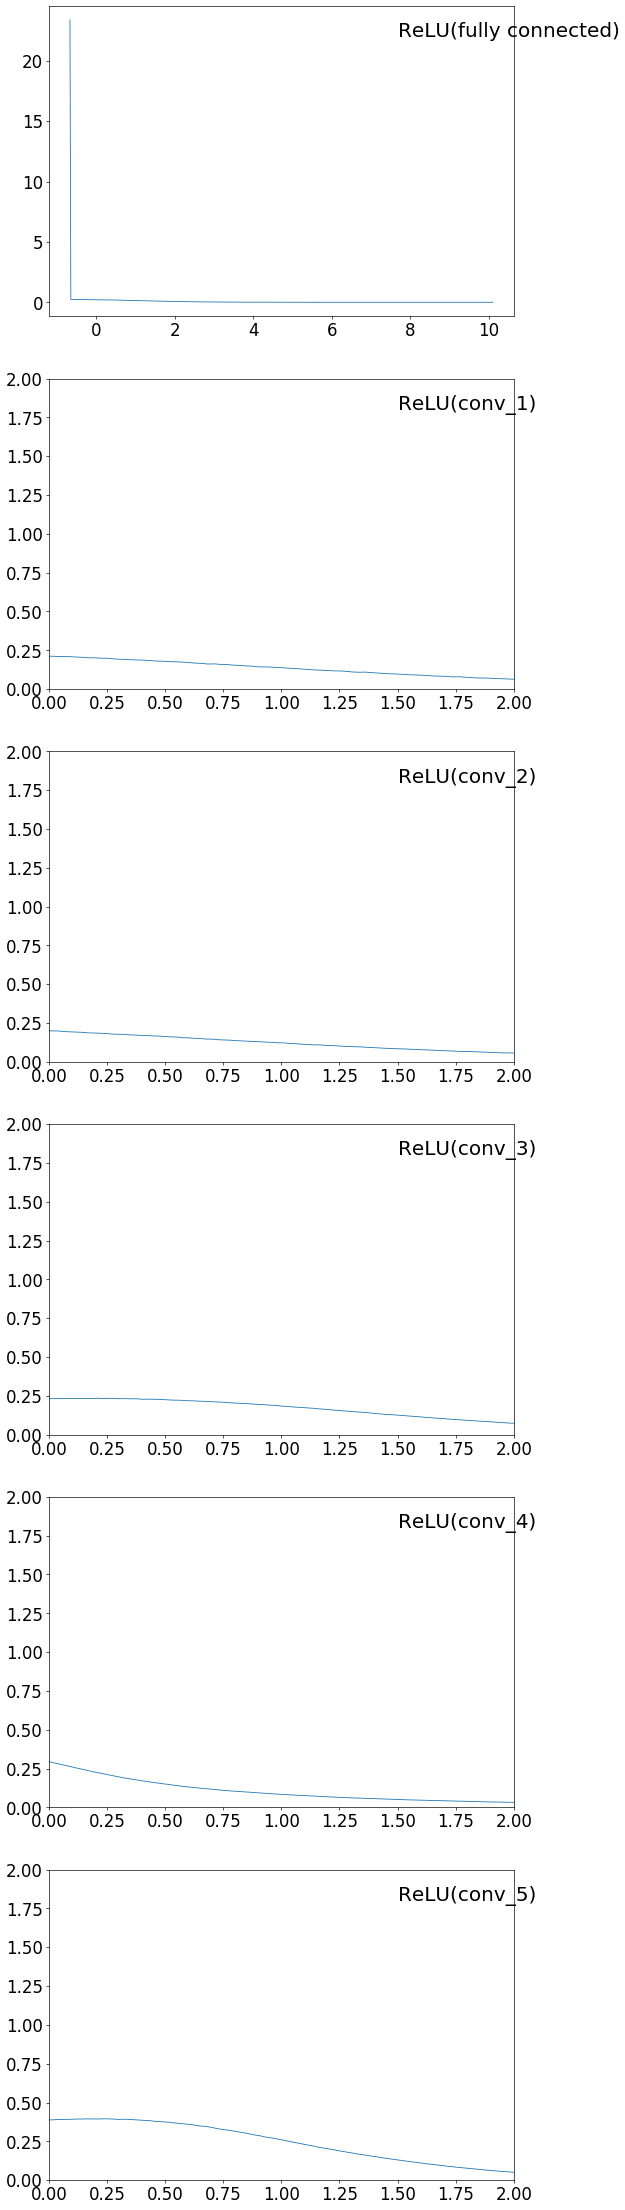

In [497]:
position = 'neuron'
histop={'bins':500, 'std':True}
out_indexes.insert(0,initial_output_index)

if GAN == 'wgangp2048' :
    neurons_indexes = [2,6,9,12,15,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [1,5,8,11,14]
elif GAN == 'wgangp' :
    neurons_indexes = [1,5,8,11,14,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [3,6,9,12,15]
i = 0 ## indice del filtro
j = 4          ## indice del layer
if position == 'neuron':
    indexes = neurons_indexes
elif position == 'conv':
    indexes = conv_indexes
elif position == 'norm':
    indexes = norm_indexes
plt.rcParams['figure.figsize'] = (10, 8*len(indexes))
labels = []
if position == 'neuron':
    for jj in range(len(indexes)):
        if jj==0: labels.append('ReLU(fully connected)')
        else:
            labels.append('ReLU(conv_'+str(jj)+')')
elif position == 'conv':
    for jj in range(len(indexes)):
        if jj==0: labels.append('dense')
        else:
            labels.append('conv_'+str(jj))
elif position == 'norm':
    for jj in range(len(indexes)):
        labels.append('norm(ReLU_'+str(jj)+')')


fig, ax = plt.subplots(len(indexes),1)
if position == 'norm':
    for jj, j in enumerate(indexes):
        ax[jj].plot(layer_outputs[j][0,:,0,i])
        ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
else:
    for jj, j in enumerate(indexes):
        if jj==0:
            pdf = stats.make_hist(layer_outputs[j][:,:],**histop)
            ax[jj].plot(*(pdf))
            ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
        else:
                pdf = stats.make_hist(layer_outputs[j][:,:,0,i],**histop)
                ax[jj].plot(*(pdf))
                #ax[jj].set_xscale('log')
                ax[jj].set_xlim([0,2])
                ax[jj].set_ylim([0,2])
                ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)